<a href="https://colab.research.google.com/github/Memohacker/Beyond-Earth-23-hackon/blob/main/Cube_sat_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 ) Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

## 2 ) Ensure that the directory structure is correct

In [ ]:
train_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\project\train'
valid_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\project\valid'

In [ ]:
cloud_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\source\cloudy'
cloud_train_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\project\train\cloudy'
cloud_valid_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\project\valid\cloudy'

In [ ]:
water_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\source\water'
water_train_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\project\train\water'
water_valid_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\project\valid\water'

In [ ]:
green_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\source\green_area'
green_train_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\project\train\green'
green_valid_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\project\valid\green'

In [ ]:
desert_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\source\desert'
desert_train_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\project\train\desert'
desert_valid_directory = r'C:\Users\natalie\OneDrive - Faculty Of Computer and Information Technology (Ain Shams University)\Desktop\project\valid\desert'

In [ ]:
cloud_image_files = [f for f in os.listdir(cloud_directory) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
# Specify a new name format
# You can customize the format according to your needs
# In this example, we're using a base name and appending an incremental number
new_name_base = 'cloudy'
start_index = 1

# Loop through the image files and rename them
for old_name in cloud_image_files:
    # Determine the file extension
    file_ext = os.path.splitext(old_name)[-1]

    # Create the new file name with the desired format
    new_name = f'{new_name_base}_{start_index:04d}{file_ext}'

    # Construct the old and new file paths
    old_path = os.path.join(cloud_directory, old_name)
    new_path = os.path.join(cloud_directory, new_name)

    # Rename the file
    os.rename(old_path, new_path)

    # Increment the start index
    start_index += 1

In [ ]:
water_image_files = [f for f in os.listdir(water_directory) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
# Specify a new name format
# You can customize the format according to your needs
# In this example, we're using a base name and appending an incremental number
new_name_base = 'water'
start_index = 1

# Loop through the image files and rename them
for old_name in water_image_files:
    # Determine the file extension
    file_ext = os.path.splitext(old_name)[-1]

    # Create the new file name with the desired format
    new_name = f'{new_name_base}_{start_index:04d}{file_ext}'

    # Construct the old and new file paths
    old_path = os.path.join(water_directory, old_name)
    new_path = os.path.join(water_directory, new_name)

    # Rename the file
    os.rename(old_path, new_path)

    # Increment the start index
    start_index += 1

In [ ]:
desert_image_files = [f for f in os.listdir(desert_directory) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
# Specify a new name format
# You can customize the format according to your needs
# In this example, we're using a base name and appending an incremental number
new_name_base = 'desert'
start_index = 1

# Loop through the image files and rename them
for old_name in desert_image_files:
    # Determine the file extension
    file_ext = os.path.splitext(old_name)[-1]

    # Create the new file name with the desired format
    new_name = f'{new_name_base}_{start_index:04d}{file_ext}'

    # Construct the old and new file paths
    old_path = os.path.join(desert_directory, old_name)
    new_path = os.path.join(desert_directory, new_name)

    # Rename the file
    os.rename(old_path, new_path)

    # Increment the start index
    start_index += 1

In [ ]:
green_image_files = [f for f in os.listdir(green_directory) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]
# Specify a new name format
# You can customize the format according to your needs
# In this example, we're using a base name and appending an incremental number
new_name_base = 'green_area'
start_index = 1

# Loop through the image files and rename them
for old_name in green_image_files:
    # Determine the file extension
    file_ext = os.path.splitext(old_name)[-1]

    # Create the new file name with the desired format
    new_name = f'{new_name_base}_{start_index:04d}{file_ext}'

    # Construct the old and new file paths
    old_path = os.path.join(green_directory, old_name)
    new_path = os.path.join(green_directory, new_name)

    # Rename the file
    os.rename(old_path, new_path)

    # Increment the start index
    start_index += 1

In [ ]:
os.makedirs(train_directory, exist_ok=True)
os.makedirs(valid_directory, exist_ok=True)


## 3 ) Split the data

In [ ]:
cloud_train_files, cloud_valid_files = train_test_split(cloud_image_files, test_size=0.2, random_state=42)

In [ ]:
for file in cloud_train_files:
    source_file_path = os.path.join(cloud_directory, file)
    destination_file_path = os.path.join(cloud_train_directory, file)
    shutil.copy(source_file_path, destination_file_path)

for file in cloud_valid_files:
    source_file_path = os.path.join(cloud_directory, file)
    destination_file_path = os.path.join(cloud_valid_directory, file)
    shutil.copy(source_file_path, destination_file_path)

In [ ]:
water_train_files, water_valid_files = train_test_split(water_image_files, test_size=0.2, random_state=42)

In [ ]:
for file in water_train_files:
    source_file_path = os.path.join(water_directory, file)
    destination_file_path = os.path.join(water_train_directory, file)
    shutil.copy(source_file_path, destination_file_path)

for file in water_valid_files:
    source_file_path = os.path.join(water_directory, file)
    destination_file_path = os.path.join(water_valid_directory, file)
    shutil.copy(source_file_path, destination_file_path)


In [ ]:
desert_train_files, desert_valid_files = train_test_split(desert_image_files, test_size=0.2, random_state=42)

In [ ]:
for file in desert_train_files:
    source_file_path = os.path.join(desert_directory, file)
    destination_file_path = os.path.join(desert_train_directory, file)
    shutil.copy(source_file_path, destination_file_path)

for file in desert_valid_files:
    source_file_path = os.path.join(desert_directory, file)
    destination_file_path = os.path.join(desert_valid_directory, file)
    shutil.copy(source_file_path, destination_file_path)


In [ ]:
green_train_files, green_valid_files = train_test_split(green_image_files, test_size=0.2, random_state=42)

In [ ]:
for file in green_train_files:
    source_file_path = os.path.join(green_directory, file)
    destination_file_path = os.path.join(green_train_directory, file)
    shutil.copy(source_file_path, destination_file_path)

for file in green_valid_files:
    source_file_path = os.path.join(green_directory, file)
    destination_file_path = os.path.join(green_valid_directory, file)
    shutil.copy(source_file_path, destination_file_path)


## 4 ) Create Data Loaders & Data Preprocessing & Data Augmentation

In [ ]:
# Creating training image data generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagenerator = ImageDataGenerator(

    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

In [ ]:
train_generator = train_imagenerator.flow_from_directory(
    train_directory,
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical',
#     classes=class_labels,
    shuffle=True
)


Found 4504 images belonging to 4 classes.


In [ ]:
# Validation image generator
val_imagenerator = ImageDataGenerator(rescale=1.0/255)

In [ ]:
validation_generator = val_imagenerator.flow_from_directory(
    valid_directory,
    target_size=(224,224),
    batch_size=20,
    class_mode='categorical',
    shuffle=True
)

Found 1127 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 28
image_size = (224, 224)

# Create ImageDataGenerator
train_imagenerator = ImageDataGenerator(
    rescale=1.0/255,   # Normalize pixel values to [0, 1]
    # You can add other data augmentation options here
)

# Create a tf.data.Dataset using image_dataset_from_directory
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    seed=45,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    valid_directory,
    seed=45,
    shuffle=False,
    image_size=image_size,
    batch_size=batch_size
)

Found 4504 files belonging to 4 classes.
Found 1127 files belonging to 4 classes.


## 5 ) Define the labeles

In [ ]:
class_names = train_data.class_names
print(class_names)

['cloudy', 'desert', 'green', 'water']


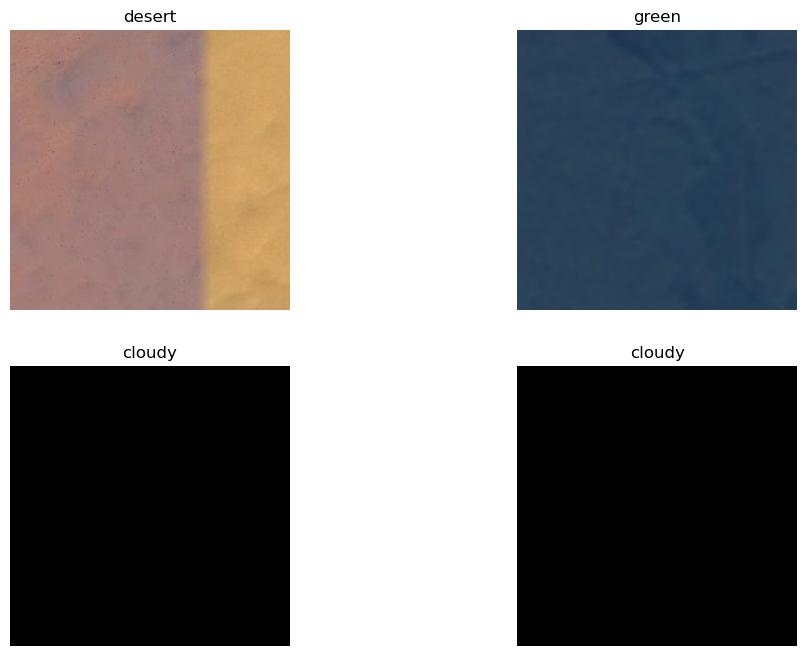

In [ ]:
class_names = train_data.class_names

plt.figure(figsize=(12, 8))
for images, labels in train_data.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

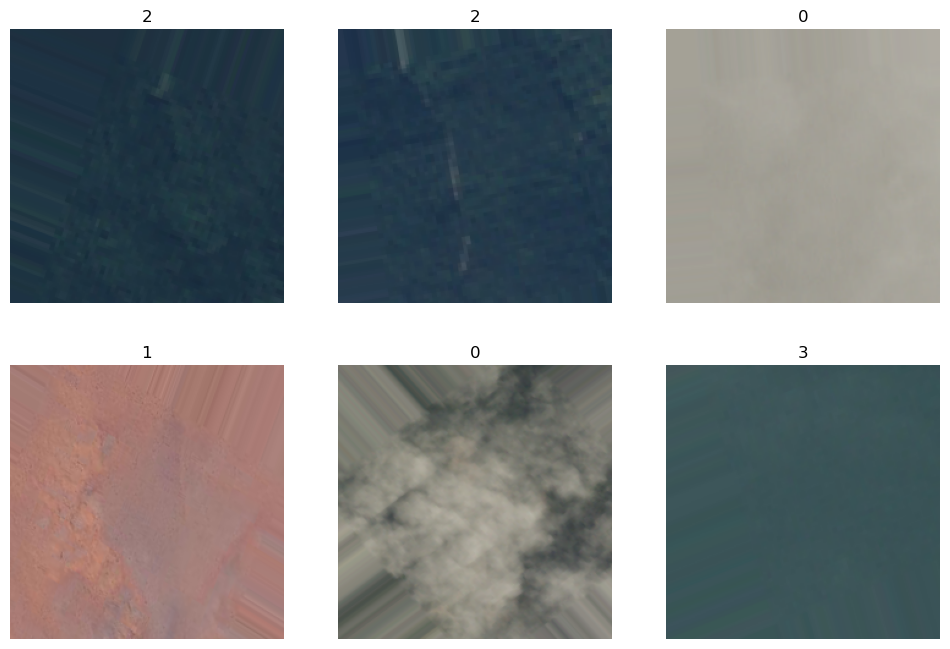

In [ ]:
augmented_images, labels = train_generator.next()

plt.figure(figsize=(12, 8))
for i in range(min(6, augmented_images.shape[0])):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(int(np.argmax(labels[i])))  # Convert one-hot encoded label to integer category
    plt.axis("off")

In [ ]:
class_names = train_data.class_names
print(class_names)

['cloudy', 'desert', 'green', 'water']


## 5 ) Design the ResNet50 Architecture

In [ ]:
model = Sequential()
pretrained_base_model = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False, # Drop imagenet classifier on the top
    input_shape=(224,224,3),
    pooling = 'avg',
    classes=100

)

In [ ]:
for layer in pretrained_base_model.layers:
  layer.trainable = False

In [ ]:
model.add(pretrained_base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # to prevent overfitting
model.add(Dense(100, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
pretrained_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
Total params: 24688100 (94.18 MB)
Trainable params: 1100388 (4.20 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
# Define the input shape
inputs = pretrained_base_model.input

# stack the inputs to pretrained model and set training to false
x = pretrained_base_model.output


# Add drop out layer

x = tf.keras.layers.Dropout(0.4)(x)

# Last output dense layer with 1 unit and sigmoid
output = tf.keras.layers.Dense(100, activation='softmax')(x)

# Build a model
resnet=Model(inputs=inputs, outputs=output)

In [ ]:
pretrained_base_model.trainable = True
print("Number of layers in the base Mnet model: ", len(pretrained_base_model.layers))

Number of layers in the base Mnet model:  176


In [ ]:
for layer in pretrained_base_model.layers:
  layer.trainable = True

In [ ]:
for layer in pretrained_base_model.layers[:100]:
    layer.trainable = False

## 6 ) Compile the Model

In [ ]:
resnet.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']

)

## 7 ) Train the ResNet50 Model

In [ ]:
# Create an EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Train the model with mini-batch gradient descent, calculate loss, and monitor metrics
resnet = resnet.fit(
    train_data,                   # Training data
    epochs=5,                # Number of training epochs
    batch_size=batch_size,        # Batch size
    validation_data=val_data,     # Validation data
    callbacks=[early_stopping],   # Early stopping callback
)


Epoch 1/5


C:\Users\ehabe\anacond\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


161/161 [==============================] - 396s 2s/step - loss: 0.1348 - accuracy: 0.9767 - val_loss: 0.2068 - val_accuracy: 0.9894
Epoch 2/5
161/161 [==============================] - 391s 2s/step - loss: 0.0231 - accuracy: 0.9953 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 3/5
161/161 [==============================] - 390s 2s/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 1.2741e-05 - val_accuracy: 1.0000
Epoch 4/5
161/161 [==============================] - 462s 3s/step - loss: 0.0072 - accuracy: 0.9989 - val_loss: 1.5896e-05 - val_accuracy: 1.0000
Epoch 5/5
161/161 [==============================] - 418s 3s/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 1.1312e-05 - val_accuracy: 1.0000


## 8 ) Evaluate the Model

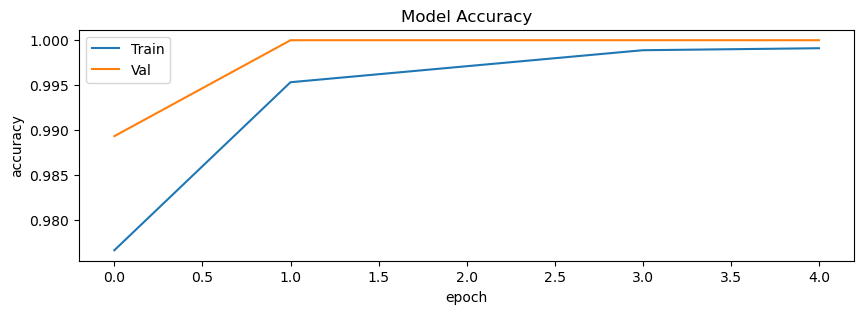

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(resnet.history['accuracy'])
plt.plot(resnet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()